In [1]:
# Mercedes Benz Project
#Importing the required libraries
#Loading the train/test data

import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
train = pd.read_csv('MERCtrain.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print('Size of training set')
print(train.shape)

Size of training set
(4209, 378)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
# Separating y column as this is for prediction output
y_train = train['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [5]:
#Checking for columns with X.

columns_x = [c for c in train.columns if 'X' in c]

# info about columns_x
print(len(columns_x))
print(train[columns_x].dtypes.value_counts())

376
int64     368
object      8
dtype: int64


In [6]:
test = pd.read_csv('MERCtest.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
print('Size of training set')
test.shape

Size of training set


(4209, 377)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
# Creating the final dataset
# Removing unwanted columns (ID).
final_column = list(set(train.columns) - set(['ID','y']))

x_train = train[final_column]
# x_train
x_test = test[final_column]
# x_test

In [10]:
x_train.head()

,X330,X151,X375,X57,X231,X62,X211,X11,X126,X339,...,X253,X353,X206,X21,X244,X343,X54,X245,X47,X1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,v
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,w
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,t
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,v


In [11]:
x_test.head()

,X330,X151,X375,X57,X231,X62,X211,X11,X126,X339,...,X253,X353,X206,X21,X244,X343,X54,X245,X47,X1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,v
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,b
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,v
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,l
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,s


In [12]:
# Searching for null values
# Creating a function for the same
def detect(df):
    if df.isnull().any().any():
        print("Yes")
    else:
        print("No")

detect(x_train)
detect(x_test)

# Observation : There are no missing values.

No
No


In [13]:
## EDA
# Integer Columns Analysis
unique_value_dict = {}
for col in x_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(x_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0]
['X330', 'X11', 'X235', 'X268', 'X297', 'X93', 'X289', 'X233', 'X293', 'X347', 'X290', 'X107']
-----------------------------------------------------------
Columns containing the unique values :  [0, 1]
['X151', 'X375', 'X57', 'X231', 'X62', 'X211', 'X126', 'X339', 'X135', 'X138', 'X114', 'X169', 'X307', 'X77', 'X10', 'X79', 'X87', 'X137', 'X22', 'X201', 'X265', 'X97', 'X246', 'X302', 'X60', 'X342', 'X260', 'X178', 'X49', 'X128', 'X236', 'X224', 'X304', 'X52', 'X103', 'X89', 'X102', 'X203', 'X144', 'X71', 'X80', 'X86', 'X226', 'X281', 'X24', 'X360', 'X322', 'X74', 'X216', 'X261', 'X218', 'X327', 'X309', 'X38', 'X91', 'X191', 'X161', 'X67', 'X45', 'X363', 'X139', 'X348', 'X124', 'X198', 'X51', 'X274', 'X155', 'X242', 'X239', 'X109', 'X158', 'X42', 'X119', 'X98', 'X73', 'X101', 'X170', 'X123', 'X90', 'X213', 'X116', 'X156', 'X190', 'X262', 'X291', 'X167', 'X29', 'X110', 'X172', 'X227', 'X12', 'X374', 'X41', 'X384', 'X279', 'X183', 'X351', 'X323'

In [14]:
# Removal of columns with a variance of 0
# means columns that have only one unique value 0. 

for column in final_column:
    check = len(np.unique(x_train[column]))
    if check == 1:
        x_train.drop(column, axis = 1, inplace=True) 
        x_test.drop(column, axis = 1, inplace=True)

x_train.head()

,X151,X375,X57,X231,X62,X211,X126,X339,X135,X138,...,X253,X353,X206,X21,X244,X343,X54,X245,X47,X1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,v
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,w
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,t
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,v


In [15]:
from sklearn import preprocessing
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[f].values)) 
        x_train[f] = lbl.transform(list(x_train[f].values))
        #x_test[f] = lbl.transform(list(x_test[f].values))   ## as values in test dataset differs from train set

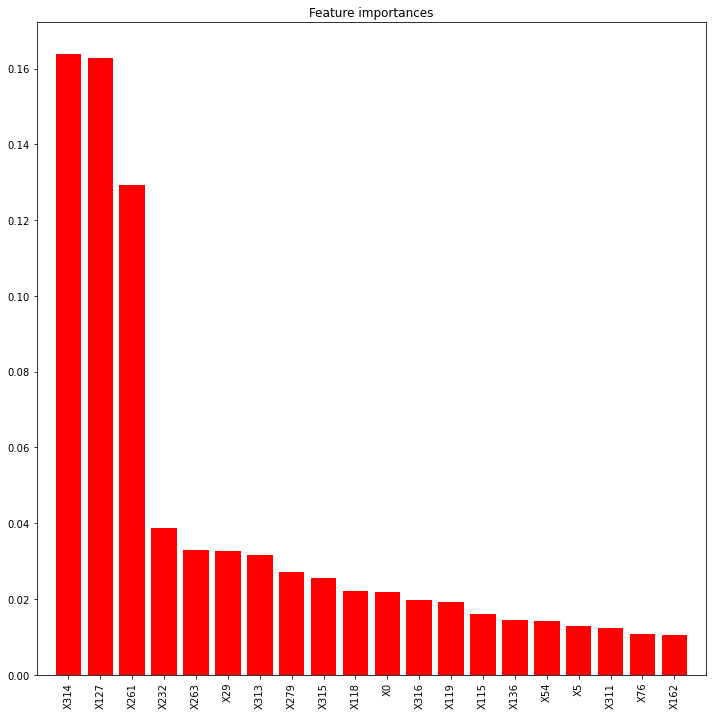

In [16]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, 
                                       max_depth=10, min_samples_leaf=4, 
                                       max_features=0.2, n_jobs=-1, 
                                       random_state=0)
model.fit(x_train, y_train)
feat_names = x_train.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [17]:
# Performing dimensionality reduction with principal components analysis
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components = n_comp, random_state = 42)
pca_result_train = pca.fit_transform(x_train)
##pca_result_test = pca.transform(x_test)


In [18]:
# ML Modeling with XGboost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Splitting the data by 80/20
x_train, x_valid, y_train, y_valid = train_test_split(pca_result_train, 
                                                      y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 42)

In [19]:
# Building the final feature set
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_valid, label = y_valid)

#f_test = xgb.DMatrix(pca_result_test)

In [20]:
# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02  ## eta means learning rate
params['max_depth'] = 4

In [21]:
# Predicting the score
# Creating a function for the same

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

P = xgb.train(params, f_train, 1000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True,verbose_eval=10)

[21:54:16] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.99705	train-r2:-59.49743	valid-rmse:98.88675	valid-r2:-61.82424
[10]	train-rmse:81.14532	train-r2:-39.64615	valid-rmse:81.05431	valid-r2:-41.20883
[20]	train-rmse:66.60017	train-r2:-26.38061	valid-rmse:66.52771	valid-r2:-27.43520
[30]	train-rmse:54.76084	train-r2:-17.51112	valid-rmse:54.72092	valid-r2:-18.23791
[40]	train-rmse:45.14306	train-r2:-11.57983	valid-rmse:45.11907	valid-r2:-12.07891
[50]	train-rmse:37.35344	train-r2:-7.61298	valid-rmse:37.35661	valid-r2:-7.96573
[60]	train-rmse:31.07078	train-r2:-4.95932	valid-rmse:31.08922	valid-r2:-5.20970
[70]	train-rmse:26.02810	train-r2:-3.18194	valid-rmse:26.04551	valid-r2:-3.35830
[80]	train-rmse:22.00456	train-r2:-1.98894	valid-rmse:22.02654	valid-r2:-2.11705
[90]	train-rmse:18.81812	train-r2:-1.18597	valid-rmse:18.84555	valid-r2:-1.28175
[100]	train-rmse:16.32131	train-r2:-0.64438	valid-rmse:16.3667

In [22]:
# Predicting on test set
#p_test = P.predict(f_test)
p_test = P.predict(f_valid)
p_test

array([ 92.081726,  97.325264, 102.80514 ,  79.42052 , 111.20336 ,
       102.25469 ,  92.483665, 102.722466, 102.84832 , 114.67555 ,
        77.045815,  96.436   ,  96.92437 , 103.00712 ,  96.346375,
        95.70965 , 109.572235,  96.9357  ,  95.25496 , 116.14738 ,
       116.10634 ,  97.67571 ,  95.698006, 101.12621 ,  93.643074,
       111.196724,  95.69794 ,  77.87261 ,  93.55375 ,  94.57901 ,
        95.00949 , 102.342964,  97.11305 , 109.06113 ,  98.91696 ,
       114.159325, 112.945305,  99.194466,  92.85645 ,  98.658905,
       116.28501 , 101.54665 , 119.967125, 108.831696,  96.03097 ,
       102.10166 ,  91.55241 , 104.07897 , 109.21979 , 104.489204,
        95.01109 ,  98.703964, 103.71467 , 107.0323  , 100.03853 ,
       101.37746 ,  98.88089 , 111.44772 ,  95.99682 ,  97.53101 ,
       109.05153 ,  76.54552 ,  95.16568 ,  95.82011 ,  77.590744,
        98.713295,  94.84705 , 100.58594 , 104.489204,  99.226395,
        94.04169 ,  94.88075 ,  98.924995, 106.25909 ,  95.952

In [23]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()

,y
0,92.081726
1,97.325264
2,102.805138
3,79.420517
4,111.203362
